In [30]:
# imports 

import os

import random 
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


from scipy import optimize


%matplotlib inline

In [31]:
# Load data

data = pd.read_csv("./Data/house_data_complete.csv")
#Attributes:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [32]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'Count')

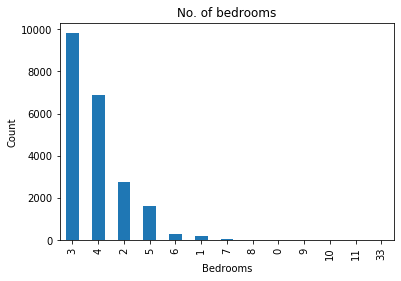

In [34]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


Text(0.5, 1.0, 'Price vs. Square Feet')

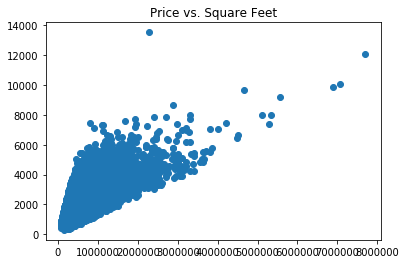

In [35]:
plt.scatter(data.price,data.sqft_living)
plt.title('Price vs. Square Feet')

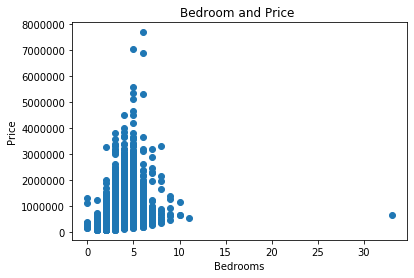

In [36]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

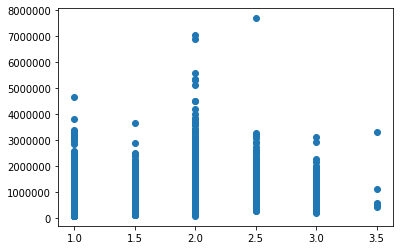

In [37]:
plt.scatter(data.floors,data.price)

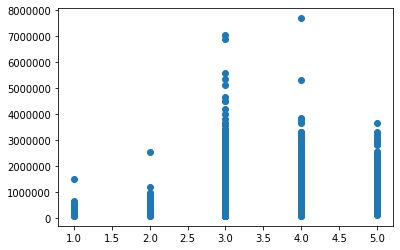

In [38]:

plt.scatter(data.condition,data.price)

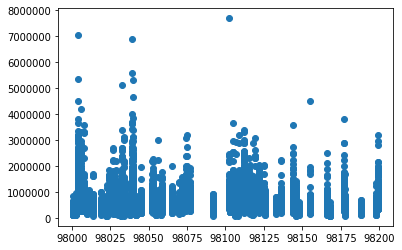

In [39]:
plt.scatter(data.zipcode,data.price)

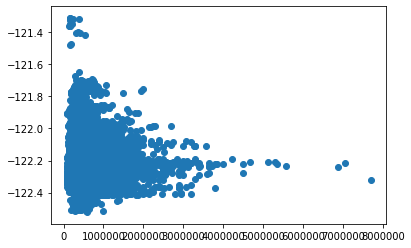

In [40]:

plt.scatter(data.price,data.long)

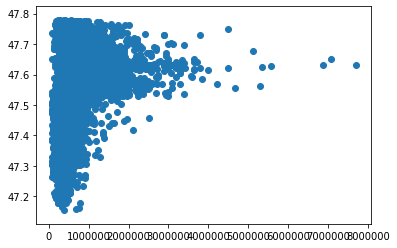

In [41]:
plt.scatter(data.price,data.lat)

In [42]:
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates

In [43]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [44]:
validate.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.323000e+03,4323.0,4.323000e+03,4323.000000,4323.000000,4323.000000,4.323000e+03,4323.000000,4323.000000,4323.000000,...,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,4.578237e+09,0.0,5.468058e+05,3.351145,2.110051,2073.427712,1.500822e+04,1.498265,0.007402,0.251214,...,7.667592,1788.210733,285.216979,1971.038168,80.288457,98079.394633,47.559996,-122.216705,1979.200324,12750.538746
std,2.868746e+09,0.0,3.850582e+05,0.908462,0.777207,941.012929,4.131567e+04,0.542339,0.085727,0.794064,...,1.182681,839.190785,445.214819,29.202839,392.116914,54.397335,0.137711,0.137910,683.598467,29024.866104
min,3.800008e+06,0.0,8.200000e+04,0.000000,0.000000,380.000000,6.000000e+02,1.000000,0.000000,0.000000,...,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,620.000000,750.000000
25%,2.130702e+09,0.0,3.250000e+05,3.000000,1.500000,1410.000000,5.035000e+03,1.000000,0.000000,0.000000,...,7.000000,1180.000000,0.000000,1951.500000,0.000000,98033.000000,47.474750,-122.328000,1490.000000,5100.000000
50%,3.904901e+09,0.0,4.500000e+05,3.000000,2.250000,1910.000000,7.560000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98070.000000,47.573600,-122.232000,1830.000000,7594.000000
75%,7.275051e+09,0.0,6.500000e+05,4.000000,2.500000,2530.500000,1.061950e+04,2.000000,0.000000,0.000000,...,8.000000,2215.000000,530.000000,1997.000000,0.000000,98118.000000,47.676400,-122.129000,2350.000000,10000.000000
max,9.839301e+09,0.0,5.570000e+06,10.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,858132.000000


In [45]:
train.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296700e+04,12967.0,1.296700e+04,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.000000,...,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,4.583602e+09,0.0,5.363636e+05,3.373024,2.109933,2074.841444,1.525523e+04,1.489743,0.007403,0.225804,...,7.646796,1779.545230,295.296213,1970.937842,82.675638,98077.771574,47.559589,-122.214286,1986.201203,12871.840672
std,2.872818e+09,0.0,3.591789e+05,0.943437,0.770644,905.062461,4.322971e+04,0.540339,0.085727,0.754791,...,1.171948,815.648294,443.921442,29.341248,397.791818,53.305573,0.138784,0.140346,684.742652,27516.436758
min,1.000102e+06,0.0,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.138700e+09,0.0,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.500000,47.470150,-122.328000,1480.000000,5100.000000
50%,3.904901e+09,0.0,4.500000e+05,3.000000,2.250000,1910.000000,7.643000e+03,1.500000,0.000000,0.000000,...,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570500,-122.232000,1840.000000,7644.000000
75%,7.312100e+09,0.0,6.400000e+05,4.000000,2.500000,2544.500000,1.067950e+04,2.000000,0.000000,0.000000,...,8.000000,2198.000000,570.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10112.500000
max,9.900000e+09,0.0,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,8860.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
test.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.323000e+03,4323.0,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,...,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,4.572465e+09,0.0,5.445425e+05,3.383993,2.133935,2101.544298,14761.008790,1.504048,0.008096,0.242887,...,7.676382,1815.102938,286.441360,1971.173953,93.695119,98076.989591,47.561500,-122.209919,1994.958362,12476.265325
std,2.896192e+09,0.0,3.722490e+05,0.910702,0.761474,935.174842,35573.634068,0.536536,0.089624,0.772169,...,1.178657,853.202543,435.810381,29.644731,422.164433,53.184926,0.138774,0.145045,689.183653,24777.259787
min,3.600057e+06,0.0,8.100000e+04,0.000000,0.000000,420.000000,690.000000,1.000000,0.000000,0.000000,...,4.000000,420.000000,0.000000,1900.000000,0.000000,98001.000000,47.180300,-122.505000,460.000000,660.000000
25%,2.008000e+09,0.0,3.250000e+05,3.000000,1.750000,1440.000000,5094.000000,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98032.000000,47.469400,-122.330000,1500.000000,5100.000000
50%,3.964400e+09,0.0,4.510000e+05,3.000000,2.250000,1920.000000,7601.000000,1.500000,0.000000,0.000000,...,7.000000,1590.000000,0.000000,1976.000000,0.000000,98065.000000,47.574500,-122.224000,1850.000000,7577.000000
75%,7.348700e+09,0.0,6.500000e+05,4.000000,2.500000,2580.000000,10757.000000,2.000000,0.000000,0.000000,...,8.000000,2250.000000,570.000000,1997.000000,0.000000,98117.000000,47.680200,-122.118000,2370.000000,10125.000000
max,9.842300e+09,0.0,7.062500e+06,10.000000,6.500000,10040.000000,577605.000000,3.000000,1.000000,4.000000,...,13.000000,7880.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777400,-121.315000,5790.000000,392040.000000


In [47]:
y = train.price

In [48]:
y.describe()

count    1.296700e+04
mean     5.363636e+05
std      3.591789e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [49]:
X = train.drop(['id', 'price'],axis=1)

In [50]:
X.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,12967.0,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,0.0,3.373024,2.109933,2074.841444,1.525523e+04,1.489743,0.007403,0.225804,3.408576,7.646796,1779.545230,295.296213,1970.937842,82.675638,98077.771574,47.559589,-122.214286,1986.201203,12871.840672
std,0.0,0.943437,0.770644,905.062461,4.322971e+04,0.540339,0.085727,0.754791,0.652796,1.171948,815.648294,443.921442,29.341248,397.791818,53.305573,0.138784,0.140346,684.742652,27516.436758
min,0.0,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,0.0,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.500000,47.470150,-122.328000,1480.000000,5100.000000
50%,0.0,3.000000,2.250000,1910.000000,7.643000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570500,-122.232000,1840.000000,7644.000000
75%,0.0,4.000000,2.500000,2544.500000,1.067950e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2198.000000,570.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10112.500000
max,0.0,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [57]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    return X_norm, mu, sigma

In [58]:
X_norm, mu, sigma = featureNormalize(X)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Computed standard deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

NameError: name 'm' is not defined

In [54]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = (1/(1+np.exp(-z)))

    return g


In [145]:
def costFunctionReg(theta, X_norm, y, lambda_):
    m = y.size 
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X_norm.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (lambda_/(2*m))*np.sum(np.square(theta))
    grad = (1/m)*X.T.dot(h-y) + (lambda_/m)*theta
    return J, grad


In [147]:
initial_theta = np.zeros(X_norm.shape[1])
lambda_ = 1
print(X_norm.shape)
print(y.shape)
print(initial_theta.shape)
cost, grad = costFunctionReg(initial_theta, X_norm, y, lambda_)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))


(12967, 22)
(12967,)
(22,)


ValueError: operands could not be broadcast together with shapes (21,) (22,) 

In [148]:
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X_norm, y, 10)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

ValueError: shapes (12967,22) and (21,) not aligned: 22 (dim 1) != 21 (dim 0)